In [11]:
import pandas as pd
import matplotlib.pyplot as plt

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


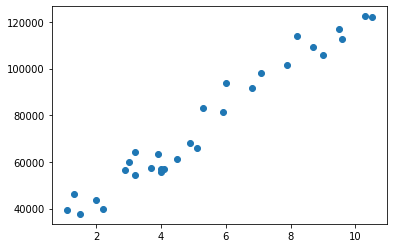

In [12]:
data = pd.read_csv("salary_data.csv")
data_col = data.columns.to_list()
print(data.head())
plt.scatter(data['YearsExperience'],data['Salary'])

In [16]:
#Stochastic Gradient Descent
# y = b0 + b1x

def sgd(data,lrate,epoch):
    b0 = 1.00
    b1 = 1.00
    epochcost=[]
    for x in range(0,epoch):
        cost = 0
        slopeb0=0
        slopeb1=0
        for i in range(0,data.shape[0]):
            ypred = (b0+b1*data['YearsExperience'][i])
            cost = cost + (data['Salary'][i]-ypred)**2
            # calculating slope
            for j in range(0,data.shape[0]):
                slopeb0 = slopeb0  -2*(data['Salary'][j]-(b0+b1*data['YearsExperience'][j]))
                slopeb1 = slopeb1  -(2*data['YearsExperience'][j])*(data['Salary'][j]-(b0+b1*data['YearsExperience'][j]))
            b0 = b0 - lrate*slopeb0
            b1 = b1 - lrate*slopeb1
        epochcost.append(cost)
        print("cost after ",x+1,"th epoch is ", cost)
    return b0,b1

In [14]:
#sampling of data -> 10% sampling 
from random import randrange
def test_train_split(data,train_size):
    train = list()
    col = data.columns.to_list()
    test = data.values.tolist()
    train_size = len(data)*train_size
    while len(train)<train_size:
        index = randrange(len(test))
        data = test.pop(index)
        train.append(data)
    train = pd.DataFrame(train,columns=col)
    test = pd.DataFrame(test,columns=col)
    return train,test
train,test = test_train_split(data,0.5)

# K-cross validation 
def k_cross_validation(data,train_size):
    iterations = 1/train_size
    for i in range(0,iterations):
        train,test = test_train_split(data,train_size)
        b0,b1 = sgd(train,0.001,1000)
        print(b0,b1)
        # classify and score 

In [18]:
train,test = test_train_split(data,0.9)
b0,b1 = sgd(train,0.0001,1000)
print(b0,b1)

cost after  1 th epoch is  85061015159.56854
cost after  2 th epoch is  72838912805.47108
cost after  3 th epoch is  63064913651.8878
cost after  4 th epoch is  54885191669.04044
cost after  5 th epoch is  47890782994.2195
cost after  6 th epoch is  41850368434.384766
cost after  7 th epoch is  36609770591.13718
cost after  8 th epoch is  32053005797.99761
cost after  9 th epoch is  28086349638.721478
cost after  10 th epoch is  24631193427.371517
cost after  11 th epoch is  21620385460.10275
cost after  12 th epoch is  18996042314.497555
cost after  13 th epoch is  16708043263.318851
cost after  14 th epoch is  14712886257.006195
cost after  15 th epoch is  12972764679.488403
cost after  16 th epoch is  11454796887.77793
cost after  17 th epoch is  10130371466.81877
cost after  18 th epoch is  8974585260.764713
cost after  19 th epoch is  7965758331.651949
cost after  20 th epoch is  7085013956.369569
cost after  21 th epoch is  6315914236.790261
cost after  22 th epoch is  5644143584